# https://cn.bing.com/search?q=kaggle&cvid=efd299c8e61d43b2822c91a62fc55f75&aqs=edge.0.69i59j0l4j69i60l4.2267j0j1&pglt=41&FORM=ANNTA1&PC=U531

In [1]:
#pip install glob
from keras.layers import Conv2D,Dense,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import os



Sample image for letterA
./archive/asl_alphabet_train/asl_alphabet_train/A\A10.jpg
Sample image for letterC
./archive/asl_alphabet_train/asl_alphabet_train/C\C10.jpg


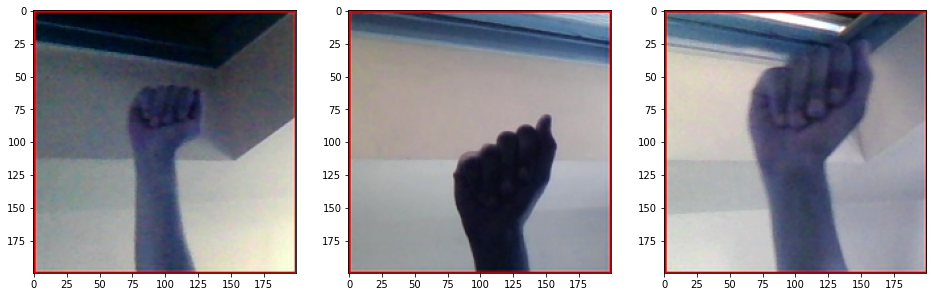

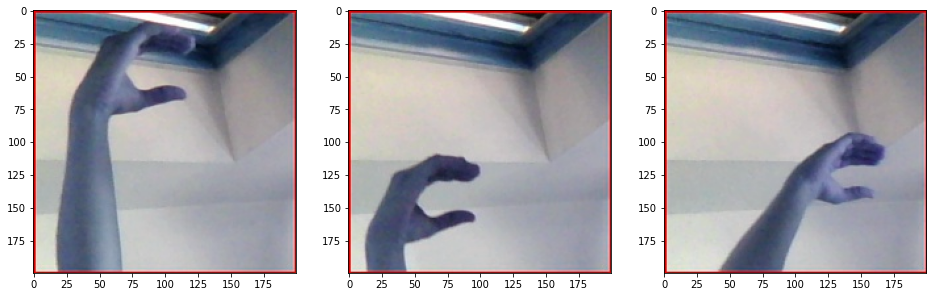

In [2]:
def plot_three_sample(letter):
    print("Sample image for letter" + letter)
    base_path = './archive/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path +letter +'/**'
    
    #print(img_path)
    path_contents = glob(img_path)
    print(path_contents[1])
    
    plt.figure(figsize=(16,16))
    
    imgs = random.sample(path_contents,3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    
plot_three_sample('A') #A____Z
plot_three_sample('C')

In [3]:
data_dir = './archive/asl_alphabet_train/asl_alphabet_train/'
traget_size=(64,64)
traget_dims = (64,64,3)
n_classes = 29
val_frac = 0.1
batch_size=64
data_augmentor = ImageDataGenerator(samplewise_center=True,
                                   samplewise_std_normalization=True,
                                   validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir,
                                                     target_size=traget_size,
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     subset='training')
val_generator = data_augmentor.flow_from_directory(data_dir,
                                                   target_size=traget_size,
                                                   batch_size=batch_size,
                                                   subset='validation')



Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
model = Sequential([
    Conv2D(64,kernel_size=4,strides=1,activation='relu',input_shape=(64,64,3)),
    Conv2D(64,kernel_size=4,strides=2,activation='relu'),
    Dropout(0.5),
    Conv2D(128,kernel_size=4,strides=1,activation='relu'),
    Conv2D(128,kernel_size=4,strides=2,activation='relu'),
    Dropout(0.5),
    Conv2D(256,kernel_size=4,strides=1,activation='relu'),
    Conv2D(256,kernel_size=4,strides=2,activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu'),
    Dense(29,activation='softmax')
    
                  
])
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 61, 64)        3136      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        65600     
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       131200    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         5

In [5]:
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
1224/1224 [==============================] - 1590s 1s/step - loss: 1.1561 - accuracy: 0.6335 - val_loss: 0.5629 - val_accuracy: 0.8253
Epoch 2/5
1224/1224 [==============================] - 1001s 818ms/step - loss: 0.2401 - accuracy: 0.9195 - val_loss: 0.4545 - val_accuracy: 0.8780
Epoch 3/5
1224/1224 [==============================] - 1275s 1s/step - loss: 0.1524 - accuracy: 0.9495 - val_loss: 0.3845 - val_accuracy: 0.9037
Epoch 4/5
1224/1224 [==============================] - 1377s 1s/step - loss: 0.1258 - accuracy: 0.9597 - val_loss: 0.3247 - val_accuracy: 0.9009
Epoch 5/5
1224/1224 [==============================] - 1223s 999ms/step - loss: 0.1052 - accuracy: 0.9680 - val_loss: 0.3772 - val_accuracy: 0.9028


In [ ]:
model.save('model.h5')
img = cv2.VideoCapture(0)
while(1):
    ret,frame = img.read()
    width,height = frame.shape[:2]
    test_img = frame[width-30:width+30,height-30:height+30,:]
    
    cv2.imshow('test_img',test_img)
    if cv2.waitKey(1)&0xff==ord('q'):
        cv2.iwwrite(i+'.jpg',test_img)
        model.aveluate(test_img)
        img.release()
        break
cv2.destoryAllwindows()